In [1]:
setwd("/home/ziverael/Dokumenty/Math/R/Time Serieses/Report1")
library("pracma")
library("tidyverse")
library("e1071")
library("ggplot2")
library("ggExtra")
library("egg")
library("moments")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.4 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::cross()  masks pracma::cross()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Dołączanie pakietu: ‘e1071’


Następujący obiekt został zakryty z ‘package:pracma’:

    sigmoid


Ładowanie wymaganego pakietu: gridExtra


Dołączanie pakietu: ‘gridExtra’


Następujący obiekt został zakryty z ‘package:dplyr’:

    combine



Dołączanie pakietu: ‘moments’


Następujące obiekty zostały zakryte z ‘package:e1071’:

    kurtosis, moment, skewness




In [2]:
dataset <- read.csv("data/data.csv", header = TRUE, sep = ";")
dochody <- as.numeric(dataset[2, 4:276])
wydatki <- as.numeric(dataset[3, 4:276])

df <- data.frame(dochody = dochody, wydatki = wydatki)

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“niekompletna końcowa linia znaleziona przez 'readTableHeader' w 'data/data.csv'”


# Analiza jednowymiarowa

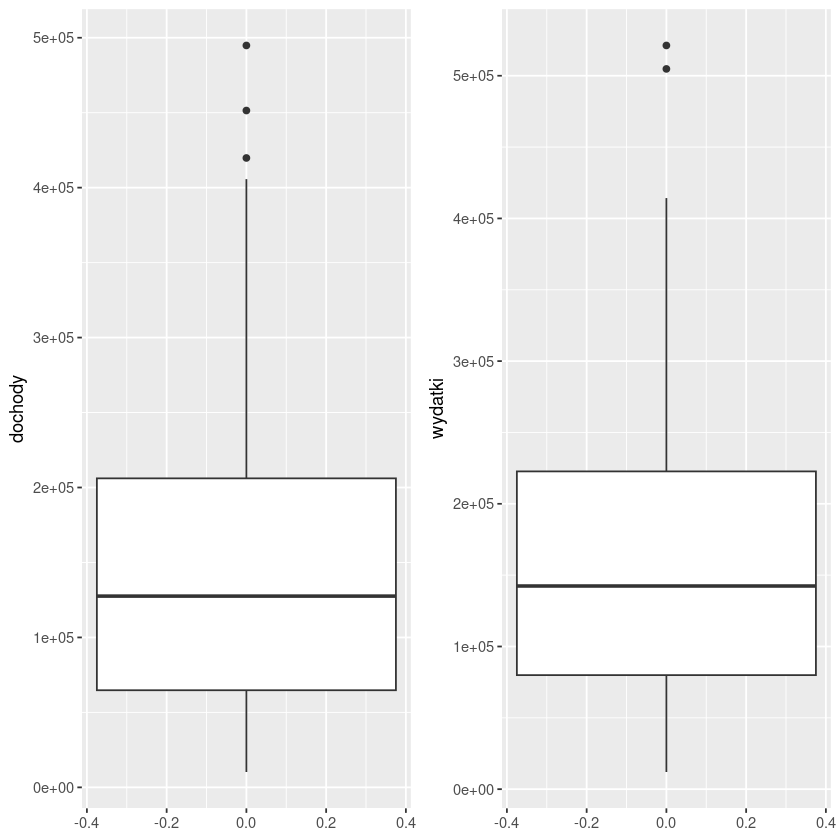

In [3]:
doch_box <-ggplot(df, aes(y = dochody)) +
geom_boxplot()

wyd_box <-ggplot(df, aes(y = wydatki)) +
geom_boxplot()

ggarrange(doch_box, wyd_box, ncol = 2)

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


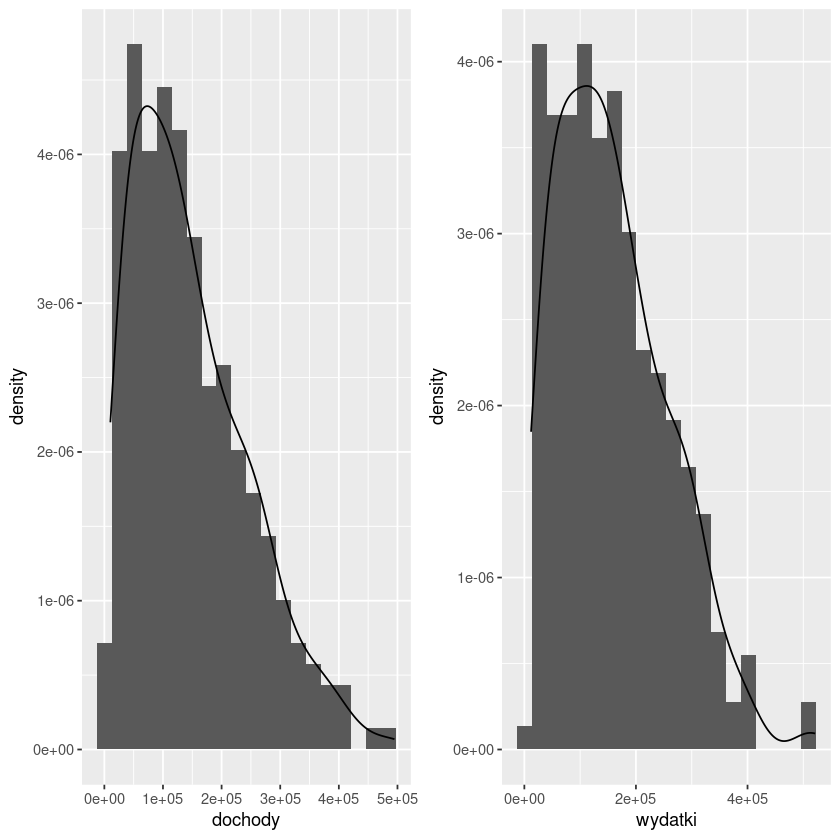

In [4]:
doch_hist <-ggplot(df, aes(x = dochody)) +
geom_histogram(
    bins = 20,
    aes(y = ..density..)
    ) +
geom_density()
# geom_histogram(aes( y = ..density..))


wyd_hist <-ggplot(df, aes(x = wydatki)) +
geom_histogram(
    bins = 20,
    aes(y = ..density..)
    ) +
geom_density()

ggarrange(doch_hist, wyd_hist, ncol = 2)


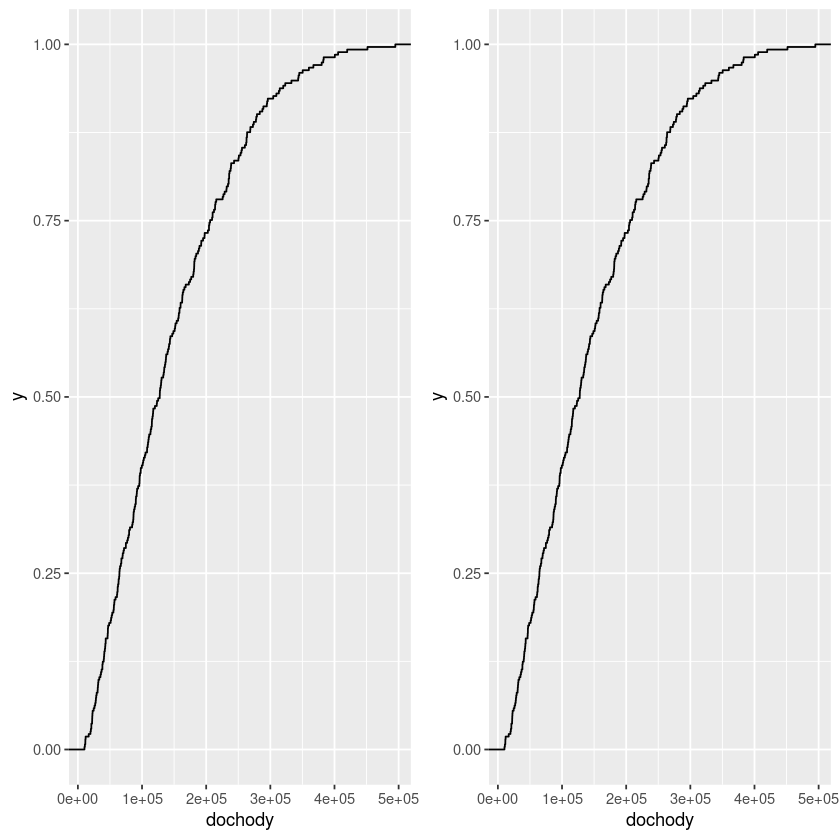

In [5]:
doch_ecdf <- ggplot(df, aes(x = dochody)) +
stat_ecdf(geom = "step")

wyd_ecdf <- ggplot(df, aes(x = dochody)) +
stat_ecdf(geom = "step")
ggarrange(doch_ecdf, wyd_ecdf, ncol = 2)



In [6]:
print("Wariancja")
print(var(df$dochody))
print(var(df$wydatki))
print("Średnia")
print(mean(df$dochody))
print(mean(df$wydatki))
print("Mediana")
print(median(df$dochody))
print(median(df$wydatki))
print("Skośność")
print(skewness(df$dochody))
print(skewness(df$wydatki))
print("Kurtoza")
print(kurtosis(df$dochody))
print(kurtosis(df$wydatki))
print("Kwartyle")
print(quantile(df$dochody))
print(quantile(df$wydatki))
print("Rozstęp")
print(max(df$dochody) -  min(df$dochody))
print(max(df$wydatki) -  min(df$wydatki))

[1] "Wariancja"
[1] 9679174055
[1] 9862460554
[1] "Średnia"
[1] 144959.9
[1] 158220.7
[1] "Mediana"
[1] 127562.3
[1] 142383.1
[1] "Skośność"
[1] 0.864572
[1] 0.734565
[1] "Kurtoza"
[1] 3.286585
[1] 3.226846
[1] "Kwartyle"
      0%      25%      50%      75%     100% 
 10250.3  64777.3 127562.3 206105.8 494843.5 
      0%      25%      50%      75%     100% 
 12038.6  79927.9 142383.1 222702.9 521216.8 
[1] "Rozstęp"
[1] 484593.2
[1] 509178.2


# Analiza zależności liniowej

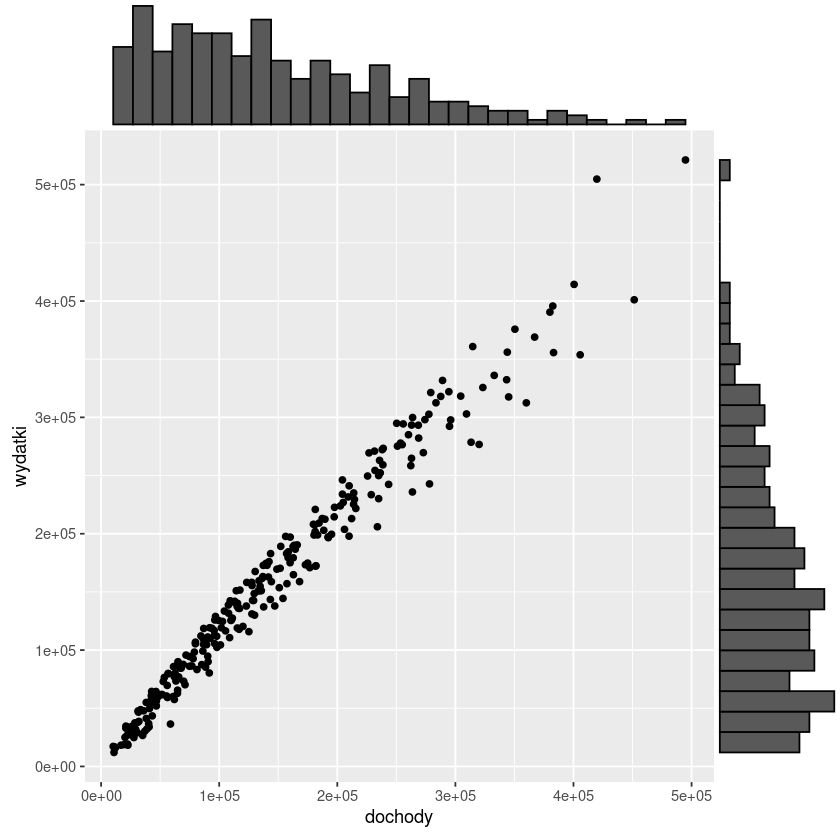

In [7]:
pl <-ggplot(df, aes(x = dochody, y = wydatki)) +
 geom_point()

ggMarginal(pl, type = "histogram")

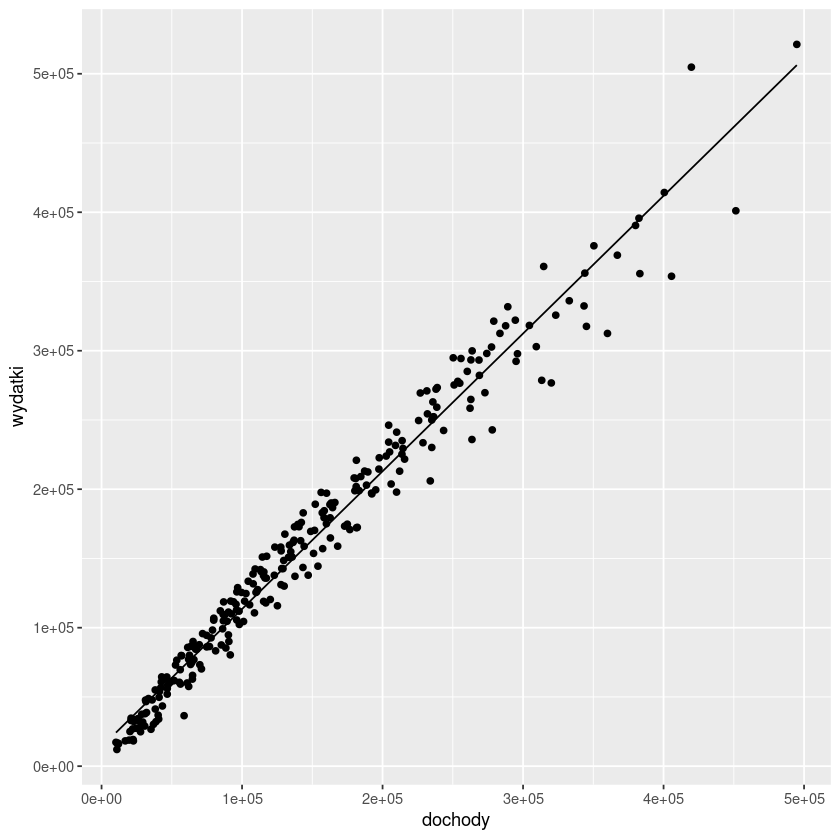

In [8]:
xs <- seq(min(df$dochody), max(df$dochody), length = 10);
fit <- polyfit(df$dochody, df$wydatki, n = 1);
regression <- polyval(fit, xs);
reg <- data.frame(x = xs, y = regression)


ggplot(df, aes(x = dochody, y = wydatki)) +
 geom_point() +
    geom_line(data = reg, aes(x= xs, y = regression))
# ggMarginal(pl, type = "histogram") +
# geom_line(data = reg, aes(x = xs, y = regression))

In [9]:
get_b0_b1 <- function(x, y){

  sum1 <- 0
  sum2 <- 0

  for(i in 1:length(x)){
    sum1 <- sum1 + x[i] * (y[i] - mean(y))
    sum2 <- sum2 + (x[i] - mean(x))^2
  }

  b1 <- sum1 / sum2
  b0 <- mean(y) - b1 * mean(x)

  return <- c(b0, b1)
}

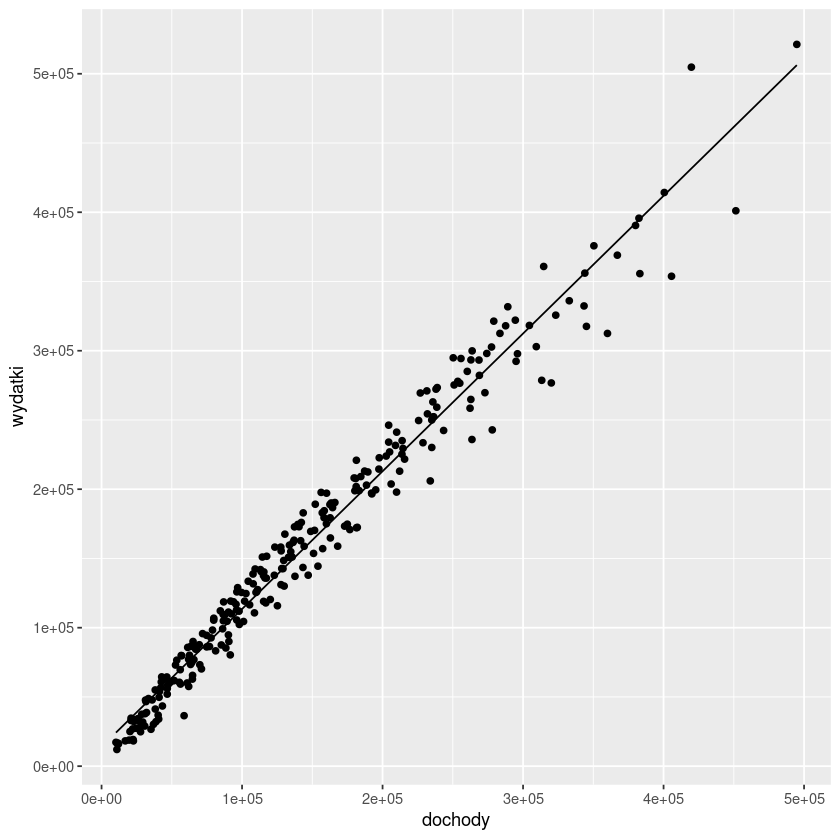

In [10]:
coef<- get_b0_b1(df$dochody, df$wydatki)
df$wydatki_reg <- c(df$dochody) * coef[2] + coef[1]

ggplot(df, aes(x = dochody, y = wydatki)) +
   geom_point() + 
   geom_line(aes(x= dochody, y = wydatki_reg))

# Analiza residuów

In [11]:
df$residua <- c(df$wydatki) - c(df$wydatki_reg)
head(df)

,dochody,wydatki,wydatki_reg,residua
,<dbl>,<dbl>,<dbl>,<dbl>
1,10914.1,12038.6,24891.73,-12853.128
2,20240.9,24992.2,34168.65,-9176.452
3,30949.7,37877.1,44820.18,-6943.085
4,40954.2,49737.2,54771.18,-5033.984
5,51761.7,61809.2,65520.89,-3711.690
6,64244.2,74894.4,77936.64,-3042.238


In [23]:
sse <- sum((df$wydatki - df$wydatki_reg)**2)
sst <- sum((df$wydatki - mean(df$wydatki))**2)
ssr <- sum((df$wydatki_reg - mean(df$wydatki))**2)

print("Całkowita suma kwadratów")
print(sst)

print("Suma kwadratów błędów")
print(sse)

print("Regresyjna suma kwadratów błędów")
print(ssr)

print("Współczynnik determinancji")
print(ssr/sst)

print("Współczynnik korelacji Pearsona")
print(sqrt(ssr/sst))

[1] "Całkowita suma kwadratów"
[1] 2.682589e+12
[1] "Suma kwadratów błędów"
[1] 77936447216
[1] "Regresyjna suma kwadratów błędów"
[1] 2.604653e+12
[1] "Współczynnik determinancji"
[1] 0.9709473
[1] "Współczynnik korelacji Pearsona"
[1] 0.9853666


In [12]:
print("suma residuów")
sum((df$wydatki - df$wydatki_reg))

[1] "suma residuów"


[1] -1.135049e-09

In [20]:
print("Współczynnik korelacji Pearsona")
s_do <- sqrt(sum((df$dochody  - mean(df$dochody)) ** 2)/ length(df$dochody))
s_wyd <- sqrt(sum((df$wydatki  - mean(df$wydatki)) ** 2)/ length(df$wydatki))
sum((df$dochody - mean(df$dochody)) * (df$wydatki - mean(df$wydatki))) / (s_do * s_wyd * (length(df$wydatki) - 1))


[1] "Współczynnik korelacji Pearsona"


[1] 0.9889893